# Summary
In this step, two major things were done

First, relevant features were selected and engineered
A. number of visits per week
B. Average page stay time for each user
C. pageview times
D. btnClick times
E. index_leave times
F. about_leave times
G. courses_leave times
H. courses_play_leave times
I. latest_utm_medium (It indicates how user find Sensor website)

Second, Logistic Regression model was built
1. Achieved model accuracy of 99.7%
2. Most predictive factors were also identified:
    total number of visits per week; 
    users from cpc medium;
    users from mfeed medium;
    users from mcpc medium.
    index leave times;
    pageview times;
    button click times;
    courses play leave times;
    courses leave times;
    users from default medium.
#

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import data
cleaned_data = pd.read_csv('sensor_cleaned_data.csv', sep='\t')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,39,41,44,46,47,49,57,58,62,63,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cleaned_data.columns

Index(['nocache', 'distinct_id', 'event', 'jssdk_error', 'time', 'type',
       'lib_lib', 'lib_method', 'lib_version', 'browser', 'browser_version',
       'ip', 'is_first_day', 'is_first_time', 'latest_referrer',
       'latest_referrer_host', 'latest_utm_campaign', 'latest_utm_content',
       'latest_utm_medium', 'latest_utm_source', 'latest_utm_term',
       'property_lib', 'property_lib_version', 'model', 'os', 'os_version',
       'referrer', 'referrer_host', 'screen_height', 'screen_width', 'title',
       'url', 'url_path', 'utm_campaign', 'utm_content', 'utm_medium',
       'utm_source', 'utm_term', 'latest_ch', 'session_from_url',
       'session_referrer', 'session_referrer_domain', 'session_referrer_host',
       'ch', 'company', 'contact', 'email', 'from_url', 'info', 'isMsg',
       'isSuccess', 'name', 'page', 'pagePosition', 'pageStayTime', 'pageUrl',
       'project_name', 'referrHostUrl', 'referrerUrl', 'requestBtn', 'result',
       'session_page_url', 'siteUrl', 's

In [4]:
cleaned_data['event'].value_counts(dropna = False)

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

In [5]:
# Feature 1 Number of visits per week
N_visits_per_week = cleaned_data.groupby(['distinct_id'])['time'].count().rename('N_visits_per_week')
N_visits_per_week[1:10]

distinct_id
000a216b72eff19bd0d5e17b9e676dd6ad9a38ac     1
000c46a27ef69fa22b56d253a9c72773338a1686    22
000ed1dcd942969b458c5b308937c6389c08f999     4
00111feff544ef5280a4c7064a362a9ea59c9389     1
0011f5066b1c62717255852fdb15a0473a5c2b19     6
0012ea1b517e6959354abaa6954711054ec831b9     2
002232cd6da95fae1cc9a5fbaa7c2d0e11fbd57b     3
00229f012ef316de6efdcbc380ffdb2558e9ff81     3
0023b8aa9adf510ef81d0e90e175d809f2bf6059     1
Name: N_visits_per_week, dtype: int64

In [6]:
# Feature 2 Average page stay time for each user
Ave_page_stay_time = cleaned_data.groupby(['distinct_id'])['pageStayTime'].mean()
Ave_page_stay_time[1:10]

distinct_id
000a216b72eff19bd0d5e17b9e676dd6ad9a38ac    921142.371000
000c46a27ef69fa22b56d253a9c72773338a1686      1742.216571
000ed1dcd942969b458c5b308937c6389c08f999        30.680000
00111feff544ef5280a4c7064a362a9ea59c9389              NaN
0011f5066b1c62717255852fdb15a0473a5c2b19         4.170000
0012ea1b517e6959354abaa6954711054ec831b9        35.747000
002232cd6da95fae1cc9a5fbaa7c2d0e11fbd57b        18.916000
00229f012ef316de6efdcbc380ffdb2558e9ff81              NaN
0023b8aa9adf510ef81d0e90e175d809f2bf6059              NaN
Name: pageStayTime, dtype: float64

In [7]:
# Feature 3 - 8 specific event times 
users = list(N_visits_per_week.index)
event_count = cleaned_data.groupby(['distinct_id', 'event'])['event'].count()
pd.DataFrame(event_count).head()

event
distinct_id                              event                       
00007ef910b6c9911f1b89d01a09aa3fc862f4a9 $pageview                  1
                                         btnClick                   1
                                         click_send_cellphone       2
                                         formSubmit                 1
                                         verify_cellphone_code      1

In [8]:
# Feature 3-8 countinued
pageview_times = list()
btnClick_times = list()
index_leave_times = list()
about_leave_times = list()
courses_leave_times = list()
courses_play_leave_times = list() 
for user in users:
    if ('$pageview' in event_count[user]):
        pageview_times.append(event_count[user]['$pageview'])
    else:
        pageview_times.append(0)
    if ('btnClick' in event_count[user]):
        btnClick_times.append(event_count[user]['btnClick'])
    else:
        btnClick_times.append(0)
    if ('index_leave' in event_count[user]):
        index_leave_times.append(event_count[user]['index_leave'])
    else:
        index_leave_times.append(0)
    if ('about_leave' in event_count[user]):
        about_leave_times.append(event_count[user]['about_leave'])
    else:
        about_leave_times.append(0)
    if ('courses_leave' in event_count[user]):
        courses_leave_times.append(event_count[user]['courses_leave'])
    else:
        courses_leave_times.append(0)
    if ('courses_play_leave' in event_count[user]):
        courses_play_leave_times.append(event_count[user]['courses_play_leave'])
    else:
        courses_play_leave_times.append(0)

In [9]:
# Feature 9-25 latest_utm_medium
cleaned_data['latest_utm_medium'].value_counts(dropna = False)

cpc                   34623
NaN                   25982
mcpc                   3255
mfeed                   934
default                 538
answer                  133
banner                   67
hao.caibaojian.com       33
production               27
sidonghui                24
toutiao.io               20
referral                 15
youjian                   8
lixinya                   6
customer_m                5
sidashidai                2
edm                       1
Name: latest_utm_medium, dtype: int64

In [10]:
cpc_medium = list()
mcpc_medium = list()
mfeed_medium = list()
default_medium = list()
answer_medium = list()
banner_medium = list()
caibaojian_medium = list()
production_medium = list()
sidonghui_medium = list()
toutiao_medium = list()
referral_medium = list()
youjian_medium = list()
lixinya_medium = list()
customer_medium = list()
sidashidai_medium = list()
edm_medium = list()
null_medium = list()
for user in users:
    temp = set(cleaned_data[cleaned_data['distinct_id'] == user]['latest_utm_medium'])
    if (np.nan in temp):
        null_medium.append(1)
    else:
        null_medium.append(0)
    if ('cpc' in temp):
        cpc_medium.append(1)
    else:
        cpc_medium.append(0)
    if ('mcpc' in temp):
        mcpc_medium.append(1)
    else:
        mcpc_medium.append(0)
    if ('mfeed' in temp):
        mfeed_medium.append(1)
    else:
        mfeed_medium.append(0)
    if ('default' in temp):
        default_medium.append(1)
    else:
        default_medium.append(0)
    if ('answer' in temp):
        answer_medium.append(1)
    else:
        answer_medium.append(0)
    if ('banner' in temp):
        banner_medium.append(1)
    else:
        banner_medium.append(0)
    if ('hao.caibaojian.com' in temp):
        caibaojian_medium.append(1)
    else:
        caibaojian_medium.append(0)
    if ('production' in temp):
        production_medium.append(1)
    else:
        production_medium.append(0)
    if ('sidonghui' in temp):
        sidonghui_medium.append(1)
    else:
        sidonghui_medium.append(0)
    if ('toutiao.io' in temp):
        toutiao_medium.append(1)
    else:
        toutiao_medium.append(0)
    if ('referral' in temp):
        referral_medium.append(1)
    else:
        referral_medium.append(0)
    if ('youjian' in temp):
        youjian_medium.append(1)
    else:
        youjian_medium.append(0)
    if ('lixinya' in temp):
        lixinya_medium.append(1)
    else:
        lixinya_medium.append(0)
    if ('customer_m' in temp):
        customer_medium.append(1)
    else:
        customer_medium.append(0)
    if ('sidashidai' in temp):
        sidashidai_medium.append(1)
    else:
        sidashidai_medium.append(0)
    if ('edm' in temp):
        edm_medium.append(1)
    else:
        edm_medium.append(0)
   

In [11]:
# Dependent variable
isSuccess = list()
for user in users:
    temp = set(cleaned_data[cleaned_data['distinct_id'] == user]['isSuccess'])
    if (True in temp):
        isSuccess.append(1)
    else:
        isSuccess.append(0)

In [12]:
Selected_features = pd.DataFrame(
    {'distinct_id': users,
     'N_visits_per_week': list(N_visits_per_week),
     'Ave_page_stay_time': list(Ave_page_stay_time),
     'pageview_times': pageview_times,
     'btnClick_times': btnClick_times,
     'index_leave_times': index_leave_times,
     'about_leave_times': about_leave_times,
     'courses_leave_times': courses_leave_times,
     'courses_play_leave_times': courses_play_leave_times,
     'null_medium': null_medium,
     'cpc_medium': cpc_medium,
     'mcpc_medium': mcpc_medium,
     'mfeed_medium': mfeed_medium,
     'default_medium': default_medium,
     'answer_medium': answer_medium,
     'banner_medium': banner_medium,
     'caibaojian_medium': caibaojian_medium,
     'production_medium': production_medium,
     'sidonghui_medium': sidonghui_medium,
     'toutiao_medium': toutiao_medium,
     'referral_medium': referral_medium,
     'youjian_medium': youjian_medium,
     'lixinya_medium': lixinya_medium,
     'customer_medium': customer_medium,
     'sidashidai_medium': sidashidai_medium,
     'edm_medium': edm_medium,
     'isSuccess': isSuccess
    })

In [13]:
Selected_features = Selected_features[[
     'distinct_id',
     'N_visits_per_week',
     'Ave_page_stay_time',
     'pageview_times',
     'btnClick_times',
     'index_leave_times',
     'about_leave_times',
     'courses_leave_times',
     'courses_play_leave_times',
     'null_medium',
     'cpc_medium',
     'mcpc_medium',
     'mfeed_medium',
     'default_medium',
     'answer_medium',
     'banner_medium',
     'caibaojian_medium',
     'production_medium',
     'sidonghui_medium',
     'toutiao_medium',
     'referral_medium',
     'youjian_medium',
     'lixinya_medium',
     'customer_medium',
     'sidashidai_medium',
     'edm_medium',
     'isSuccess'
]]

In [14]:
Selected_features.head(10)

,distinct_id,N_visits_per_week,Ave_page_stay_time,pageview_times,btnClick_times,index_leave_times,about_leave_times,courses_leave_times,courses_play_leave_times,null_medium,...,production_medium,sidonghui_medium,toutiao_medium,referral_medium,youjian_medium,lixinya_medium,customer_medium,sidashidai_medium,edm_medium,isSuccess
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,6,NaN,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,921142.371000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000c46a27ef69fa22b56d253a9c72773338a1686,22,1742.216571,6,9,6,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,000ed1dcd942969b458c5b308937c6389c08f999,4,30.680000,2,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,00111feff544ef5280a4c7064a362a9ea59c9389,1,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0011f5066b1c62717255852fdb15a0473a5c2b19,6,4.170000,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0012ea1b517e6959354abaa6954711054ec831b9,2,35.747000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,002232cd6da95fae1cc9a5fbaa7c2d0e11fbd57b,3,18.916000,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,00229f012ef316de6efdcbc380ffdb2558e9ff81,3,NaN,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0023b8aa9adf510ef81d0e90e175d809f2bf6059,1,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Selected_features.isnull().sum()

distinct_id                    0
N_visits_per_week              0
Ave_page_stay_time          4296
pageview_times                 0
btnClick_times                 0
index_leave_times              0
about_leave_times              0
courses_leave_times            0
courses_play_leave_times       0
null_medium                    0
cpc_medium                     0
mcpc_medium                    0
mfeed_medium                   0
default_medium                 0
answer_medium                  0
banner_medium                  0
caibaojian_medium              0
production_medium              0
sidonghui_medium               0
toutiao_medium                 0
referral_medium                0
youjian_medium                 0
lixinya_medium                 0
customer_medium                0
sidashidai_medium              0
edm_medium                     0
isSuccess                      0
dtype: int64

In [16]:
Selected_features['Ave_page_stay_time'] = Selected_features['Ave_page_stay_time'].fillna(Selected_features['Ave_page_stay_time'].median())

In [17]:
Selected_features.to_csv('sensor_data_selected_features', sep = '\t', encoding='utf-8', index = False)

In [18]:
converted = Selected_features[Selected_features['isSuccess'] == 1]
converted.shape[0]

457

In [19]:
non_converted = Selected_features[Selected_features['isSuccess'] == 0]
non_converted.shape[0]

11251

# Split train and test data #

In [20]:
from sklearn.model_selection import train_test_split
X_train_converted, X_test_converted, y_train_converted, y_test_converted = train_test_split(\
    converted.drop(['distinct_id', 'isSuccess'], axis = 1), converted[['isSuccess']], test_size=0.2, random_state=1)
X_train_NonConvert, X_test_NonConvert, y_train_NonConvert, y_test_NonConvert = train_test_split(\
    non_converted.drop(['distinct_id', 'isSuccess'], axis = 1), non_converted[['isSuccess']], test_size=0.2, random_state=1)

In [21]:
X_train = pd.DataFrame()
y_train = pd.DataFrame()
X_test = pd.DataFrame()
y_test = pd.DataFrame()
for i in range(25):
    X_train = X_train.append([X_train_converted])
    y_train = y_train.append([y_train_converted])
X_train = X_train.append([X_train_NonConvert])
y_train = y_train.append([y_train_NonConvert])
y_train = y_train.values.ravel()
X_test = X_test.append([X_test_converted, X_test_NonConvert])
y_test = y_test.append([y_test_converted, y_test_NonConvert])
y_test = y_test.values.ravel()

# Metrics # 

In [22]:
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [23]:
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [24]:
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of conversion')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.997009  0.997011
Accuracy   0.994097  0.985489
Precision  0.988410  0.730159
Recall     1.000000  1.000000
f1-score   0.994171  0.844037


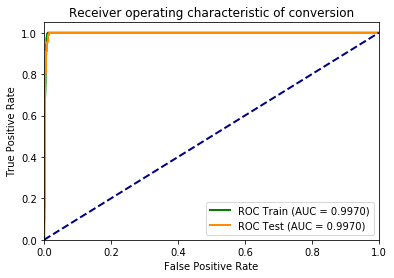

In [29]:
# Building Logistic Regression Model
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
clf_LR = LogisticRegression()
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.5, 1.0], 
    'penalty': ['l1', 'l2'],
    'random_state': [1]
}
acc_scorer = make_scorer(roc_auc_score)
grid_obj = GridSearchCV(clf_LR, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
clf_LR_best = grid_obj.best_estimator_
train_test_model(clf_LR_best, X_train, y_train, X_test, y_test)

In [30]:
def get_top_values(lst, n, labels):
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]

In [34]:
coef_name = np.array(list(X_train.columns))
coef_value = clf_LR_best.coef_[0]
get_top_values(coef_value, 5, coef_name)

['N_visits_per_week',
 'cpc_medium',
 'mfeed_medium',
 'mcpc_medium',
 'null_medium']

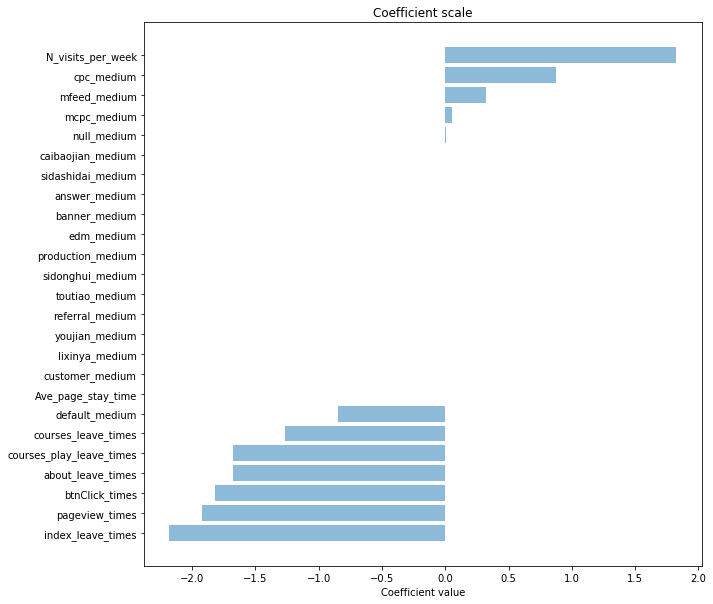

In [35]:
plt.figure(figsize=(10,10))
objects = [coef_name[i] for i in np.argsort(coef_value)[::-1][:]]
y_pos = np.arange(len(objects))
plt.barh(y_pos, np.sort(coef_value)[::-1], align='center', alpha = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Coefficient value')
plt.title('Coefficient scale')
plt.gca().invert_yaxis()

#
Based on the above output, the positive predictors are:
    total number of visits per week; 
    users from cpc medium;
    users from mfeed medium;
    users from mcpc medium.
    
Based on the above output, the negative predictors are:
    index leave times;
    pageview times;
    button click times;
    courses play leave times;
    courses leave times;
    users from default medium.
# 